In [1]:
%matplotlib inline

# Import Dependencies

In [2]:
# Data analysis
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams["figure.figsize"] = (12, 8)
# Miscellaneous
from itertools import cycle, islice

# Preprocessing

In [3]:
df = pd.read_csv('dataset_1.csv')
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11


Forward fill the date column to handle missing values.

In [4]:
df['Date'].fillna(method='ffill', inplace=True)
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11


Next, convert the date column to `datetime` by manually specifying the right string format.

In [5]:
df['Date'].unique()

array(['10-Sep-12', '11-Sep-12', '12-Sep-12', '13-Sep-12', '14-Sep-12',
       '15-Sep-12', '16-Sep-12', '17-Sep-12', '18-Sep-12', '19-Sep-12',
       '20-Sep-12', '21-Sep-12', '22-Sep-12', '23-Sep-12', '24-Sep-12'],
      dtype=object)

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,2012-09-10,7,5,0,2,2,9
1,2012-09-10,8,6,0,2,2,14
2,2012-09-10,9,8,3,0,0,14
3,2012-09-10,10,9,2,0,1,14
4,2012-09-10,11,11,1,4,4,11


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              336 non-null    datetime64[ns]
 1   Time (Local)      336 non-null    int64         
 2   Eyeballs          336 non-null    int64         
 3   Zeroes            336 non-null    int64         
 4   Completed Trips   336 non-null    int64         
 5   Requests          336 non-null    int64         
 6   Unique Drivers    336 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 18.5 KB


Finally, handle the data entry errors by striping leading/trailing white spaces in the column names.

In [8]:
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers'],
      dtype='object')

In [9]:
df.columns = df.columns.str.strip()

# Data Exploration

Now that the data is in good shape, let's make some visualizations to try and understand the data. We expect to see lots of eyeballs relative to other columns, since some of them will be converted into zeroes, requests, or completed trips.

Let's see if there are any relations between these values.

In [10]:
# Make a copy of df for exploratory analysis
df_0 = df.copy()

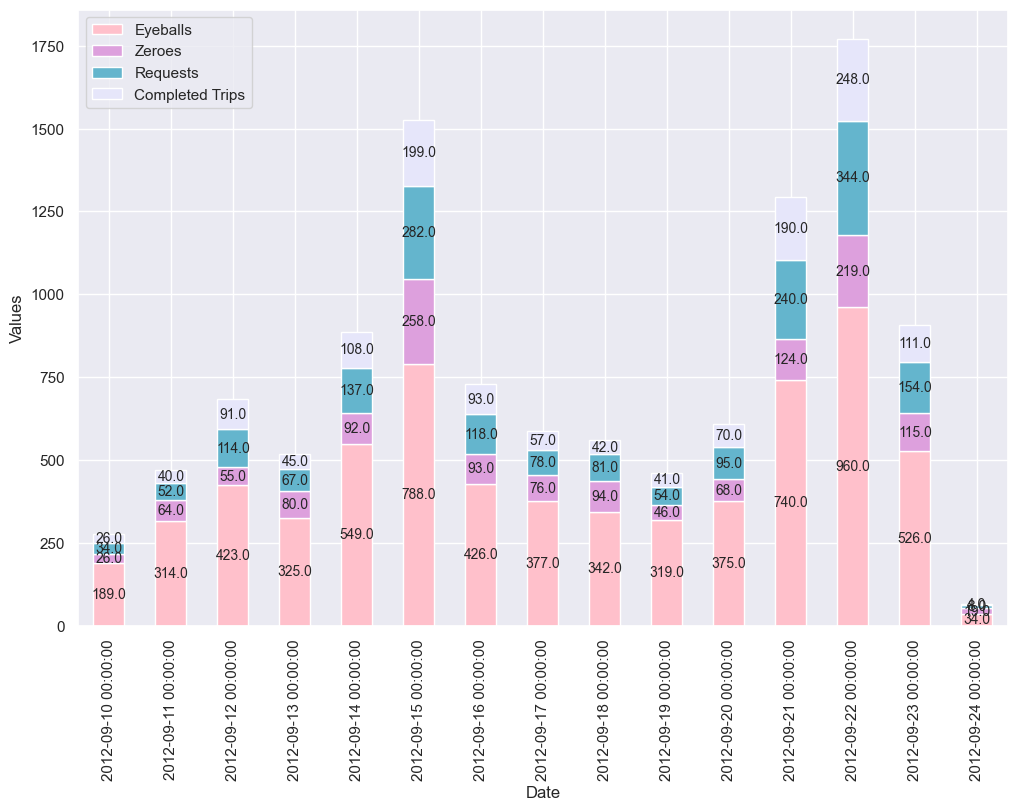

In [11]:
my_colors = list(islice(cycle(['pink', 'plum', 'c', 'lavender']), None, len(df_0)))
ax = df_0[['Date', 'Eyeballs', 'Zeroes', 'Requests', 'Completed Trips']].groupby('Date').sum().reset_index().plot(kind='bar', 
                                                                                                                 stacked=True, 
                                                                                                                 x='Date', 
                                                                                                                 color=my_colors)
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # Remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=10)
plt.ylabel('Values')
plt.show()

Notice the weekly trend present in the data - we can inspect this further by aggregating against the day-of-week. 

In [12]:
# Extract day-of-week from original dates
df_0['Weekday'] = df_0['Date'].dt.weekday
df_agg_dow = df_0.groupby('Weekday').sum().reset_index()
day_of_week = {0: 'Monday', 
               1: 'Tuesday', 
               2: 'Wednesday', 
               3: 'Thursday', 
               4: 'Friday', 
               5: 'Saturday', 
               6: 'Sunday'}
df_agg_dow['Weekday'] = df_agg_dow['Weekday'].map(day_of_week)

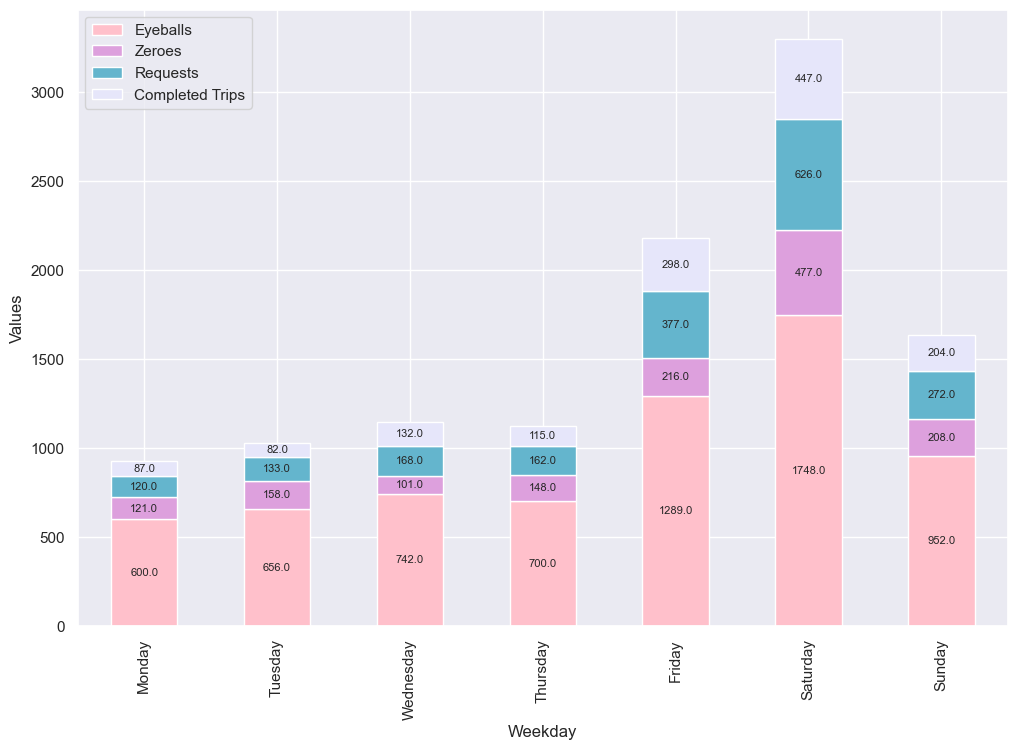

In [13]:
ax = df_agg_dow[['Weekday', 'Eyeballs', 'Zeroes', 'Requests', 'Completed Trips']].plot(kind='bar', 
                                                                                       stacked=True, 
                                                                                       x='Weekday', 
                                                                                       color=my_colors)
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # Remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)
plt.ylabel('Values')
plt.show()

It appears that Saturdays are the busiest day by some margin.

Let's see if there are any trends from aggregating by the hour.

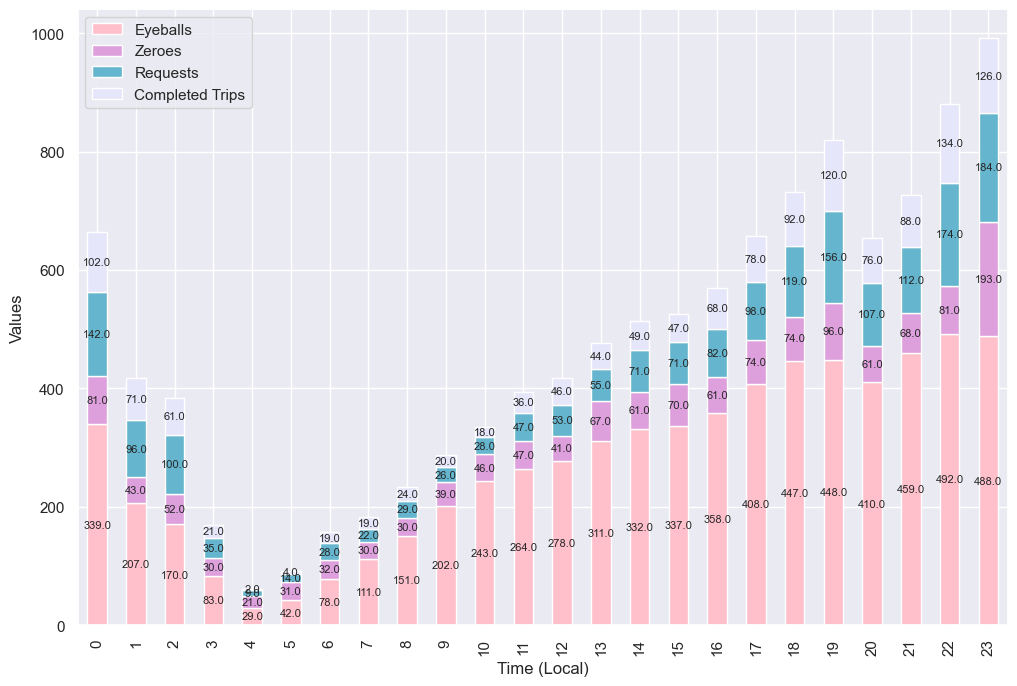

In [14]:
ax = df_0[['Time (Local)', 'Eyeballs', 'Zeroes', 'Requests', 'Completed Trips']].groupby('Time (Local)').sum().reset_index().plot(kind='bar', 
                                                                                                                                  stacked=True, 
                                                                                                                                  x='Time (Local)', 
                                                                                                                                  color=my_colors)
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # Remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)
plt.ylabel('Values')
plt.show()

Interesting, activity seems to be at a minimum from 0400 - 0500, growing steadily as the day progresses, and peaking at 2300 - 0000 before dying down again.

Finally, let's observe the distributions of unique drivers when aggregating by day-of-week and hour-of-day, respectively.

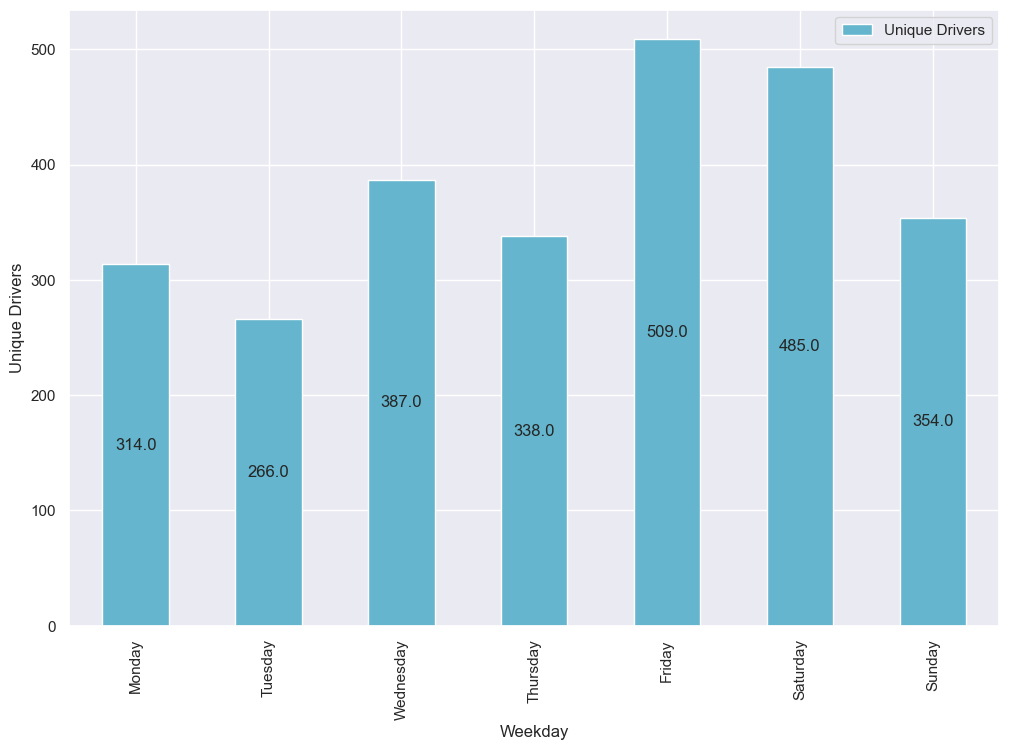

In [15]:
ax = df_agg_dow[['Weekday', 'Unique Drivers']].plot(kind='bar', 
                                                    stacked=True, 
                                                    x='Weekday', 
                                                    color='c')
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # Remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=12)
plt.ylabel('Unique Drivers')
plt.show()

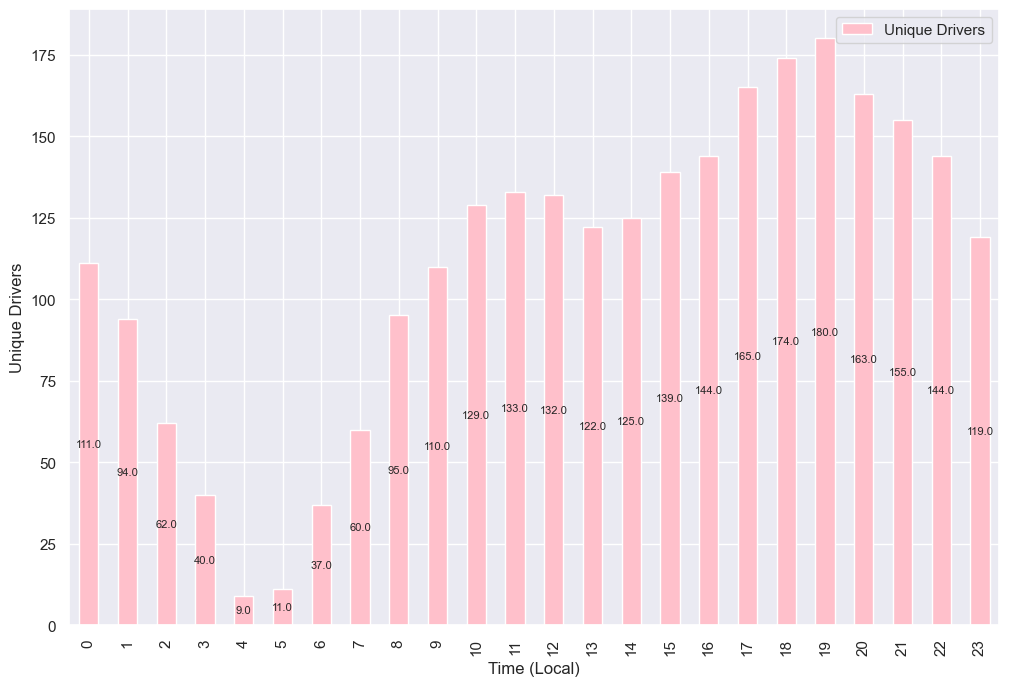

In [16]:
ax = df_0[['Time (Local)', 'Unique Drivers']].groupby('Time (Local)').sum().reset_index().plot(kind='bar', 
                                                                                               stacked=True, 
                                                                                               x='Time (Local)', 
                                                                                               color=my_colors)
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # Remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)
plt.ylabel('Unique Drivers')
plt.show()

As expected, both are similar to what we observed from the demand (requests, eyeballs, etc.).

# Analysis

### 1. Which date had the most completed trips during the two week period?

In [17]:
df_1 = df.groupby(['Date'])['Completed Trips'].sum()
df_1

Date
2012-09-10     26
2012-09-11     40
2012-09-12     91
2012-09-13     45
2012-09-14    108
2012-09-15    199
2012-09-16     93
2012-09-17     57
2012-09-18     42
2012-09-19     41
2012-09-20     70
2012-09-21    190
2012-09-22    248
2012-09-23    111
2012-09-24      4
Name: Completed Trips, dtype: int64

In [18]:
df_1[df_1 == df_1.max()]

Date
2012-09-22    248
Name: Completed Trips, dtype: int64

Answer: September 22, 2012

### 2. What was the highest number of completed trips within a 24 hour period?

In [19]:
df_2 = df['Completed Trips'].rolling(24).sum()
df_2

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
331    61.0
332    52.0
333    52.0
334    53.0
335    54.0
Name: Completed Trips, Length: 336, dtype: float64

In [20]:
df_2.max()

278.0

Answer: 278

### 3. Which hour of the day had the most requests during the two week period?

In [21]:
df_3 = df.groupby(['Time (Local)'])['Requests'].sum()
df_3

Time (Local)
0     142
1      96
2     100
3      35
4       9
5      14
6      28
7      22
8      29
9      26
10     28
11     47
12     53
13     55
14     71
15     71
16     82
17     98
18    119
19    156
20    107
21    112
22    174
23    184
Name: Requests, dtype: int64

In [22]:
df_3[df_3 == df_3.max()]

Time (Local)
23    184
Name: Requests, dtype: int64

Answer: 2300 - 0000

### 4. What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)? 

Tip: The local time value is the start of the hour (e.g. 15 is the hour from 3:00pm - 4:00pm)

In [23]:
df_4 = df.copy()
df_4['Day'] = pd.to_datetime(df_4['Date']).dt.dayofweek

weekend_zeroes = df_4[(((df_4['Day'] == 4) & (df_4['Time (Local)'] >= 17))
                        | (df_4['Day'] == 5) 
                        | ((df_4['Day'] == 6) & (df_4['Time (Local)'] <= 2)))]['Zeroes'].sum()
total_zeroes = df_4['Zeroes'].sum()

print(f'{weekend_zeroes / total_zeroes * 100:.2f}%')

44.86%


Answer: 44.86%

### 5. What is the weighted average ratio of completed trips per driver during the two week period? 

Tip: "Weighted average" means your answer should account for the total trip volume in each hour to determine the most accurate number in whole period.

In [24]:
df_5 = df.copy()
# Remove rows where unique drivers = 0
df_5 = df_5.loc[df_5['Unique Drivers'] > 0]
# Find completed trips per driver for each hour
df_5['Completed Trips per Driver'] = df_5['Completed Trips'] / df_5['Unique Drivers']
# Compute weights (percentage of completed trips) for each hour
df_5['Percentage of Completed Trips'] = df_5['Completed Trips'] / df_5['Completed Trips'].sum()
# Get weighted average
print(np.average(df_5['Completed Trips per Driver'] * df_5['Percentage of Completed Trips']))

0.002788813372084982


In [25]:
# Verify that the weighted average is different from the average
print(np.average(df_5['Completed Trips per Driver']))

0.4743397876937869


Answer: 0.0028 completed trips per driver

### 6. In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.

In [26]:
# Find total unique requests for each hour across 2 week period
df_6 = df.groupby(['Time (Local)'])['Requests'].sum()
# Calculate rolling 8 hour sum of total requests
df_6 = pd.concat([df_6[17:], df_6], axis=0)
df_6 = df_6.rolling(8).sum()
# Find window where rolling sum is maximized (shift starts 7 hours before indexed time)
df_6[df_6 == df_6.max()]

Time (Local)
0    1092.0
Name: Requests, dtype: float64

Answer: 1700 - 0100

### 7. True or False: Driver supply always increases when demand increases during the two week period. 

Tip: Visualize the data to confirm your answer if needed.

In [27]:
df_7 = df.copy()
df_7['Delta Requests'] = df_7['Requests'].rolling(2).apply(lambda x: x.iloc[1] - x.iloc[0])
df_7['Delta Drivers'] = df_7['Unique Drivers'].rolling(2).apply(lambda x: x.iloc[1] - x.iloc[0])
df_7.dropna(inplace=True)
df_7

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Delta Requests,Delta Drivers
1,2012-09-10,8,6,0,2,2,14,0.0,5.0
2,2012-09-10,9,8,3,0,0,14,-2.0,0.0
3,2012-09-10,10,9,2,0,1,14,1.0,0.0
4,2012-09-10,11,11,1,4,4,11,3.0,-3.0
5,2012-09-10,12,12,0,2,2,11,-2.0,0.0
...,...,...,...,...,...,...,...,...,...
331,2012-09-24,2,3,3,0,2,0,2.0,0.0
332,2012-09-24,3,3,3,0,1,0,-1.0,0.0
333,2012-09-24,4,1,1,0,0,0,-1.0,0.0
334,2012-09-24,5,4,2,1,1,3,1.0,3.0


In [28]:
# Check if demand increases when supply increases
(df_7[df_7['Delta Drivers'] > 0]['Delta Requests'] > 0).all()

False

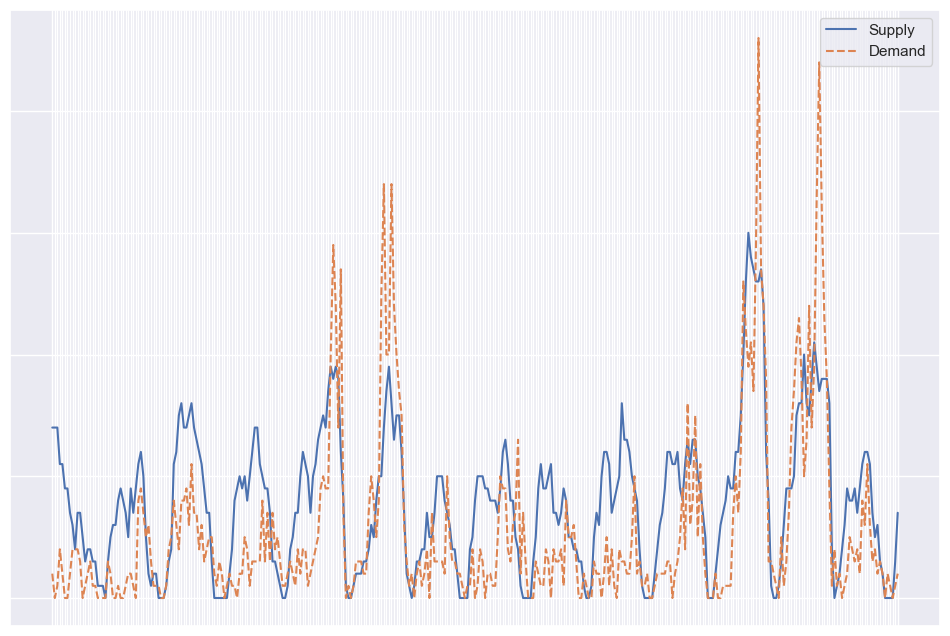

In [29]:
# Verify our answer by visualizing the data
df_7['Datetime'] = df_7['Date'].astype(str) + ' : ' + df_7['Time (Local)'].astype(str)
# Make plots
fig, ax = plt.subplots(1, 1)
ax.plot(df_7['Datetime'], df_7['Unique Drivers'])
ax.plot(df_7['Datetime'], df_7['Requests'], linestyle='--')
# Create legend
ax.legend(['Supply', 'Demand'])
# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])

plt.show()

Answer: False

### 8. In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

In [30]:
df_8 = df.copy()
df_8.set_index(['Date', 'Time (Local)'], inplace=True)
df_8 = df_8[['Zeroes', 'Eyeballs']].rolling(72).sum()
df_8.dropna(inplace=True)
df_8['Zeroes to Eyeballs Ratio'] = df_8['Zeroes'] / df_8['Eyeballs']
df_8[df_8['Zeroes to Eyeballs Ratio'] == df_8['Zeroes to Eyeballs Ratio'].max()]

,,Zeroes,Eyeballs,Zeroes to Eyeballs Ratio
Date,Time (Local),,,
2012-09-18,4,438.0,1495.0,0.292977


Answer: 2012-09-16 05:00 to 2012-09-18 05:00

### 9. If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to? 

Hint: Consider both rider eyeballs and driver supply when choosing

In [31]:
# Get total eyeballs and drivers for each hour over 2 weeks
df_9 = df.groupby(['Time (Local)'])[['Eyeballs', 'Unique Drivers']].sum()
# Remove rows where eyeballs = 0
df_9 = df_9[df_9['Eyeballs'] > 0]
# Find drivers per eyeball for each hour
df_9['Drivers per Eyeball'] = df_9['Unique Drivers'] / df_9['Eyeballs']
# Get hour with min value (would gain most from adding 5 drivers)
df_9[df_9['Drivers per Eyeball'] == df_9['Drivers per Eyeball'].min()]

,Eyeballs,Unique Drivers,Drivers per Eyeball
Time (Local),,,
23,488,119,0.243852


Answer: 2300 - 0000

### 10. True or False: There is exactly two weeks of data in this analysis

In [32]:
df_10 = df.copy()
df_10['Datetime'] = df['Date'].astype(str) + ' ' + df['Time (Local)'].astype(str)
# 24 hrs/day * 14 days = 336 entries
len(df_10['Datetime'].unique())

336

Answer: True

### 11. Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums) 

Tip: Visualize the data to confirm your answer if needed.

In [33]:
df_11 = df.groupby(['Time (Local)'])[['Requests', 'Unique Drivers']].sum()
# Find time where requests are minimized
df_11[df_11['Requests'] == df_11['Requests'].min()]

,Requests,Unique Drivers
Time (Local),,
4,9,9


In [34]:
# Find time where drivers are minimized
df_11[df_11['Unique Drivers'] == df_11['Unique Drivers'].min()]

,Requests,Unique Drivers
Time (Local),,
4,9,9


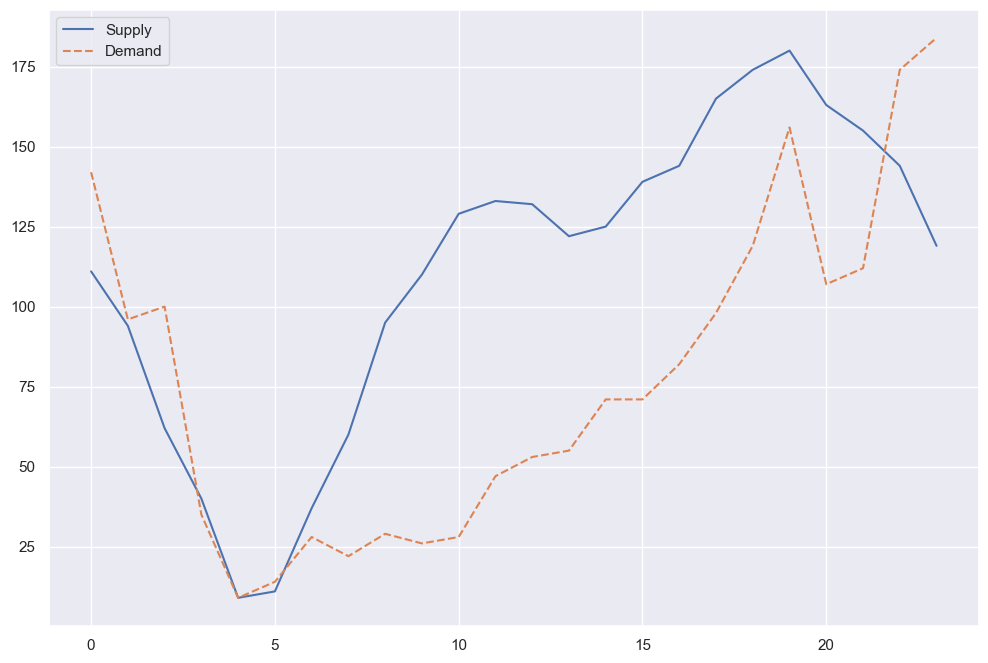

In [35]:
# Verify our answer by visualizing the data
df_11.reset_index(inplace=True)
# Make plots
fig, ax = plt.subplots(1, 1)
ax.plot(df_11['Time (Local)'], df_11['Unique Drivers'])
ax.plot(df_11['Time (Local)'], df_11['Requests'], linestyle='--')
# Create legend
ax.legend(['Supply', 'Demand'])

plt.show()

Answer: 0400